<a href="https://colab.research.google.com/github/kartiksingh0/100days-of-machine-learning/blob/main/30_Function_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/train (1).csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
y.head(5)

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

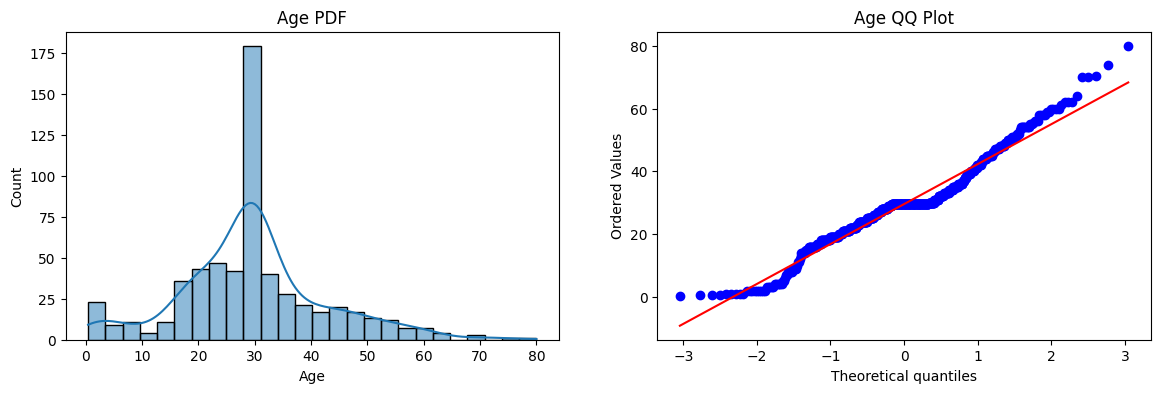

In [ ]:
# Create a figure with width 14 inches and height 4 inches
# This helps in displaying subplots clearly side by side
plt.figure(figsize=(14,4))

# Create the first subplot: 1 row, 2 columns, 1st position (left side)
plt.subplot(121)

# Plot histogram of Age with KDE (Probability Density Function)
sns.histplot(X_train['Age'], kde=True)

# Set title for the first plot
plt.title("Age PDF")

# Create the second subplot: 1 row, 2 columns, 2nd position (right side)
plt.subplot(122)

# Create a Q-Q plot to check if Age follows a normal distribution
stats.probplot(X_train['Age'], dist='norm', plot=plt)

# Set title for the second plot
plt.title('Age QQ Plot')

# Display both plots
plt.show()


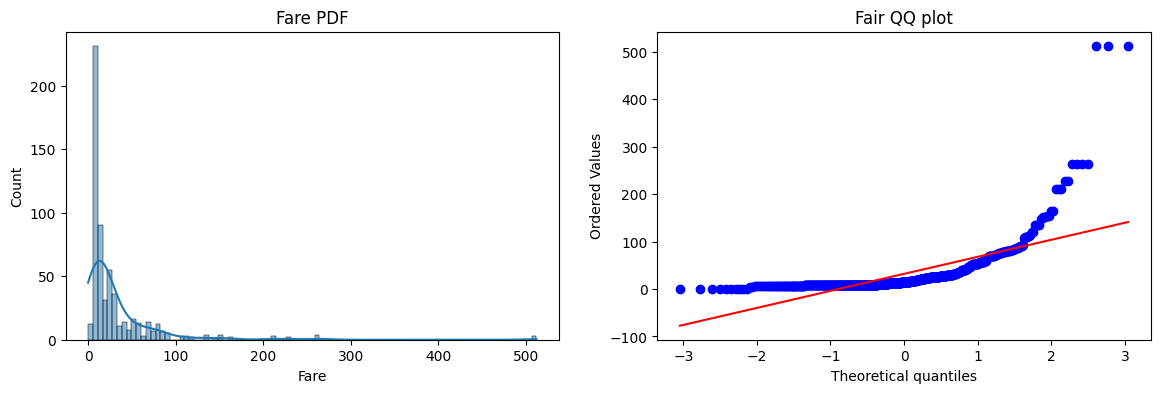

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot= plt)
plt.title('Fair QQ plot')
plt.show()

In [ ]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

print("LR",accuracy_score(y_test,y_pred))
print("DT",accuracy_score(y_test,y_pred1))

LR 0.6576271186440678
DT 0.6542372881355932


In [ ]:
trf = FunctionTransformer(func= np.log1p)

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf1.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

print("LR",accuracy_score(y_test,y_pred))
print("DT",accuracy_score(y_test,y_pred1))

LR 0.7152542372881356
DT 0.5966101694915255


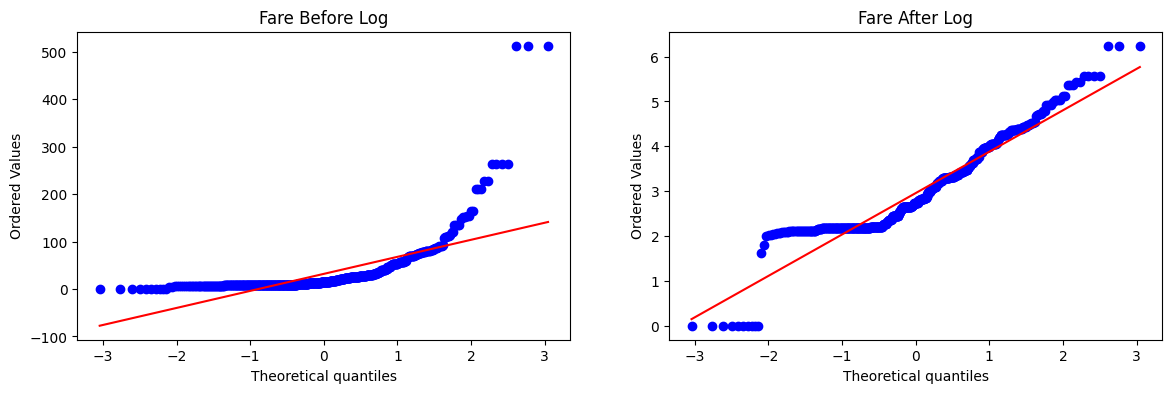

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

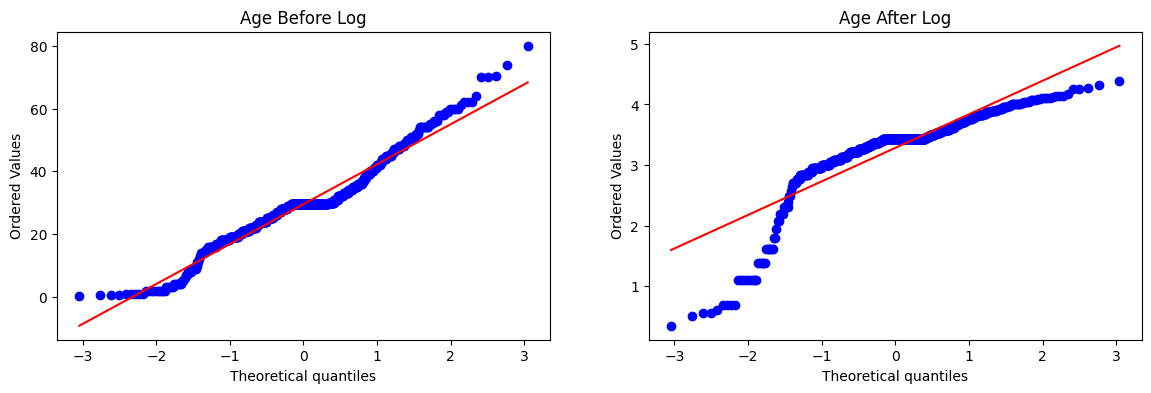

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()